
БАЗОВАЯ МОДЕЛЬ (100 нейронов в 1 слое)
+----+--------------------+---------+
|    | Metric             |   Value |
+====+====================+=========+
|  0 | Mean Squared Error | 12.2558 |
+----+--------------------+---------+
|  1 | R-squared          |  0.8329 |
+----+--------------------+---------+

ИССЛЕДОВАНИЕ АРХИТЕКТУР СЕТИ
+----------------+--------------------+--------------------+----------+
|  Архитектура   |        MSE         |         R2         | Итерации |
+----------------+--------------------+--------------------+----------+
|     (10,)      | 18.692216295629645 | 0.7451077049336926 |   1376   |
|     (50,)      | 16.090845582099128 | 0.7805807243447243 |   649    |
|     (100,)     | 12.255835560795024 | 0.8328759947649065 |   782    |
|    (50, 50)    | 11.889994879445128 | 0.8378647007280244 |   472    |
| (100, 50, 25)  | 13.81494309048327  | 0.8116155679534367 |   147    |
| (150, 100, 50) | 11.186580926063208 | 0.8474566503461712 |   161    |
+---------------

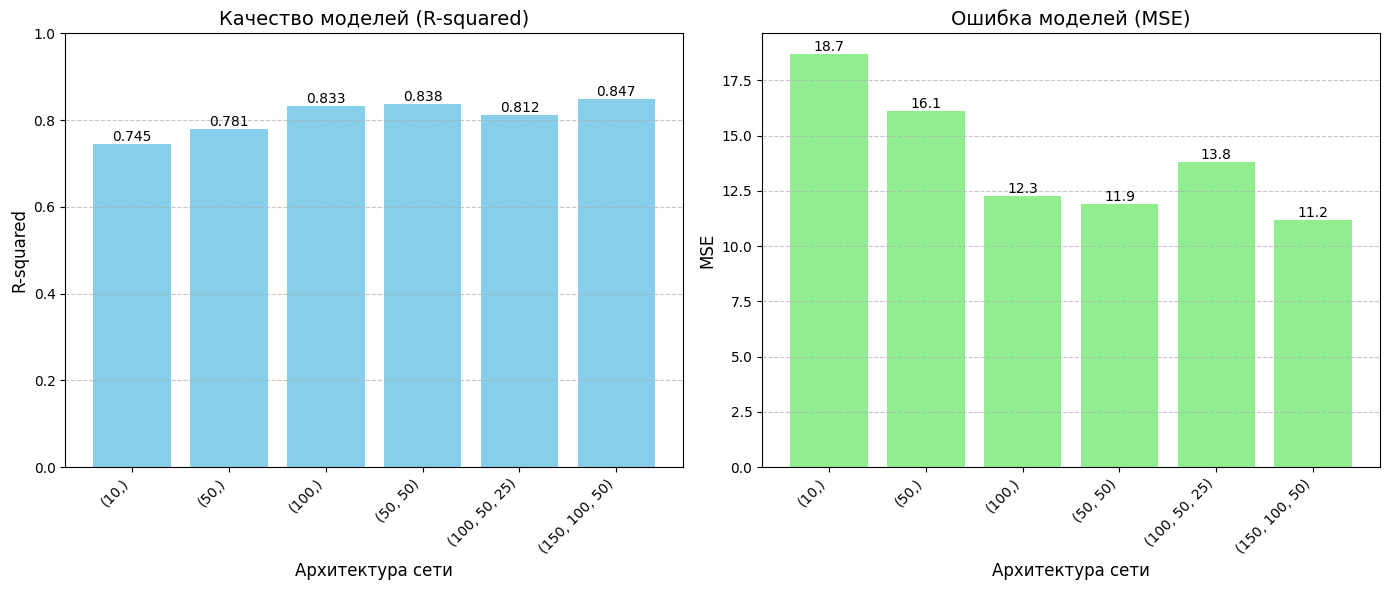


ЛУЧШАЯ АРХИТЕКТУРА СЕТИ:
Архитектура: (150, 100, 50)
MSE: 11.1866
R2: 0.8475
Итераций обучения: 161


In [5]:
import warnings
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


warnings.filterwarnings("ignore", category=UserWarning)
# Пришлось скачать таблицу отдельно, т.к. по этническим соображениям BostonHousing был удалён с новых версий scikit-learn(((
data = pd.read_csv('BostonHousing.csv')
X = data.drop('medv', axis=1)
y = data['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


def print_results(title, metrics):
    print(f"\n{title}")
    print("=" * 50)
    print(tabulate(metrics, headers="keys", tablefmt="grid", floatfmt=".4f"))
    print("=" * 50)


# Создание и обучение модели
base_model = MLPRegressor(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    max_iter=2000,
    early_stopping=True,
    validation_fraction=0.2,
    random_state=42
)
base_model.fit(X_train_scaled, y_train)
y_pred = base_model.predict(X_test_scaled)
metrics = pd.DataFrame({
    "Metric": ["Mean Squared Error", "R-squared"],
    "Value": [
        mean_squared_error(y_test, y_pred),
        r2_score(y_test, y_pred)
    ]
})

print_results("БАЗОВАЯ МОДЕЛЬ (100 нейронов в 1 слое)", metrics)
architectures = [
    (10,),
    (50,),
    (100,),
    (50, 50),
    (100, 50, 25),
    (150, 100, 50)
]

results = []

print("\nИССЛЕДОВАНИЕ АРХИТЕКТУР СЕТИ")
print("=" * 50)

for arch in architectures:
    model = MLPRegressor(
        hidden_layer_sizes=arch,
        activation='relu',
        solver='adam',
        max_iter=2000,
        early_stopping=True,
        validation_fraction=0.2,
        random_state=42
    )
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    results.append({
        "Архитектура": str(arch),
        "MSE": mean_squared_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred),
        "Итерации": model.n_iter_
    })

print(tabulate(
    pd.DataFrame(results),
    headers="keys",
    tablefmt="pretty",
    showindex=False,
    floatfmt=".4f"
))
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
bars = plt.bar(
    [str(x) for x in architectures],
    [x['R2'] for x in results],
    color='skyblue'
)
plt.title('Качество моделей (R-squared)', fontsize=14)
plt.xlabel('Архитектура сети', fontsize=12)
plt.ylabel('R-squared', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.,
        height,
        f'{height:.3f}',
        ha='center',
        va='bottom'
    )

# График MSE
plt.subplot(1, 2, 2)
bars = plt.bar(
    [str(x) for x in architectures],
    [x['MSE'] for x in results],
    color='lightgreen'
)
plt.title('Ошибка моделей (MSE)', fontsize=14)
plt.xlabel('Архитектура сети', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.,
        height,
        f'{height:.1f}',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()

# Вывод лучшей модели
best_model = max(results, key=lambda x: x['R2'])
print("\nЛУЧШАЯ АРХИТЕКТУРА СЕТИ:")
print("=" * 50)
print(f"Архитектура: {best_model['Архитектура']}")
print(f"MSE: {best_model['MSE']:.4f}")
print(f"R2: {best_model['R2']:.4f}")
print(f"Итераций обучения: {best_model['Итерации']}")
print("=" * 50)
